In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./dataset/bestofrt.tsv',sep='\t')

In [3]:
df.head()

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370


In [19]:
import requests

In [20]:
url = 'https://www.rottentomatoes.com/m/et_the_extraterrestrial'
response = requests.get(url)

In [29]:
with open("et_the_extraterrestrial.html", mode='wb') as file:
    file.write(response.content)

In [31]:
from bs4 import BeautifulSoup as bs
soup = bs(response.content,features="lxml" )
title = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]
print(title)


E.T. The Extra-Terrestrial (1982)


In [16]:
soup

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html>
<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<script src="//cdn.optimizely.com/js/594670329.js"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width,initial-scale=1" name="viewport">
<meta content="VPPXtECgUUeuATBacnqnCm4ydGO99reF-xgNklSbNbc" name="google-site-verification"/>
<meta content="034F16304017CA7DCF45D43850915323" name="msvalidate.01"/>
<link href="https://staticv2-4.rottentomatoes.com/static/images/iphone/apple-touch-icon.png" rel="apple-touch-icon"/>
<link href="https://staticv2-4.rottentomatoes.com/static/images/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="https://staticv2-4.rottentomatoes.com/static/styles/css/rt_main.css" rel="stylesheet"/>
<script id="jsonLdSchema" type="applicat

In [ ]:
soup.find('')

In [79]:
df_list = []
folder = './dataset/rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:
        soup = bs(file)
        title = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]
        audience_score = soup.find('div',class_='audience-score meter').find('span').contents[0][0:-1]
        num_ratings = soup.find('div', class_='audience-info hidden-xs superPageFontColor').find_all('div')[1].contents[2].strip().replace(',','')
        critic_score = soup.find('div',class_='critic-score meter').find_all('span')[1].contents[0].contents[0]
        num_critic_ratings = soup.find('div', class_='tab-pane active').find_all('span')[5].contents[0]
        df_list.append({'title': title,
                      'audience_score': int(audience_score),
                      'number_of_audience_ratings': int(num_ratings),
                      'critic_score': int(critic_score),
                      'number_of_critic_ratings': int(num_critic_ratings) })


In [80]:
df = pd.DataFrame(df_list,columns=['title','audience_score','number_of_audience_ratings','critic_score','number_of_critic_ratings'])

In [81]:
df.to_csv('./dataset/moives.csv')

In [82]:
df.head()

,title,audience_score,number_of_audience_ratings,critic_score,number_of_critic_ratings
0,12 Angry Men (Twelve Angry Men) (1957),97,103672,100,49
1,The 39 Steps (1935),86,23647,98,44
2,The Adventures of Robin Hood (1938),89,33584,100,45
3,All About Eve (1950),94,44564,100,64
4,All Quiet on the Western Front (1930),89,17768,100,40


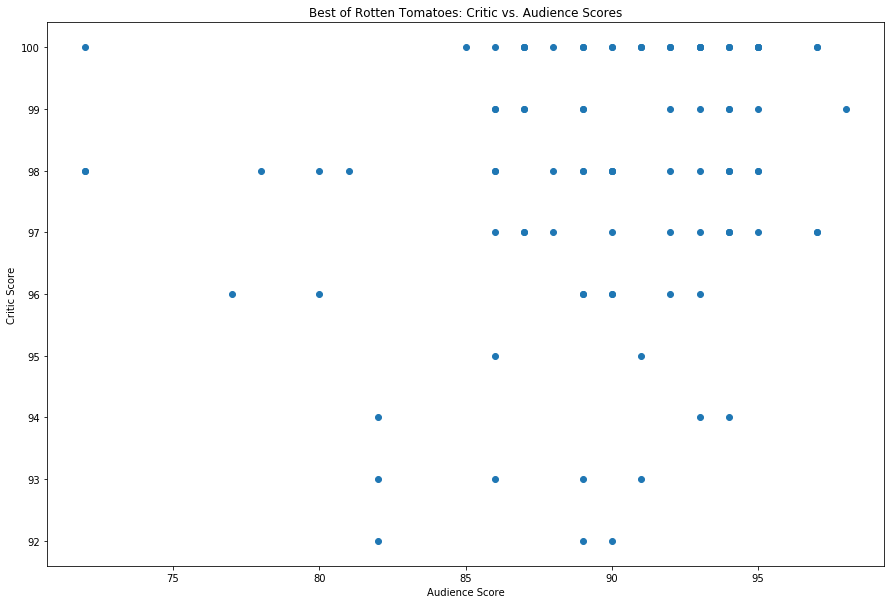

In [101]:
plt.figure(figsize=(15,10))
plt.scatter(df.audience_score, df.critic_score)
plt.xlabel('Audience Score')
plt.ylabel('Critic Score')
plt.title('Best of Rotten Tomatoes: Critic vs. Audience Scores')

plt.savefig('./dataset/pics/scatter_score.png')

In [106]:
from IPython.core.display import HTML
HTML("<iframe src=https://public.tableau.com/profile/zhang.yarong#!/vizhome/RottenTomatoMovies/Sheet1?publish=yes width=900 height=700></iframe>")



In [88]:
df_list = []
folder = './dataset/rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:
        soup = bs(file)
        title = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]
        critic_score = soup.find('div',class_='critic-score meter').find_all('span')[1].contents[0].contents[0]
        num_ratings = soup.find('div', class_='tab-pane active').find_all('span')[7].contents[0]
#         [1].contents[2].strip().replace(',','')
        
        print(num_ratings)
        
        break

49
